In [363]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [364]:
df=pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [365]:
df['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [366]:
df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [367]:
df['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [369]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [370]:
df.duplicated().sum()

np.int64(0)

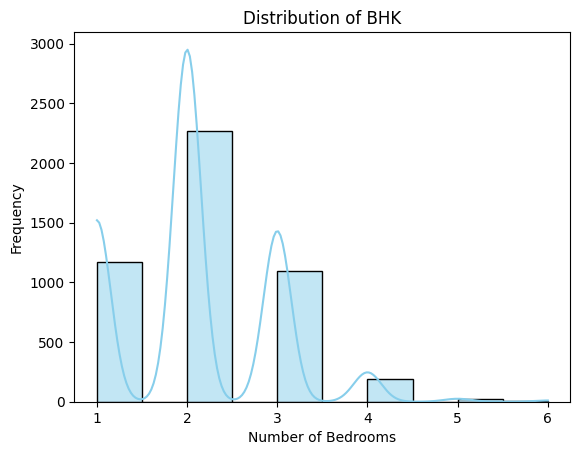

0.5992157733648072


In [371]:
sns.histplot(df['BHK'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of BHK')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()
print(df['BHK'].skew())

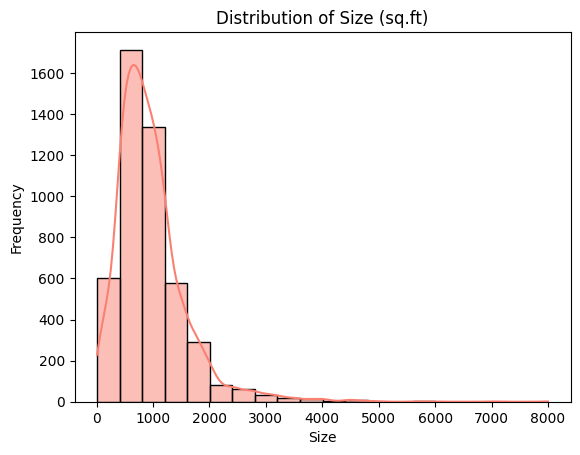

2.2998924373541834


In [372]:
sns.histplot(df['Size'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Size (sq.ft)')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()
print(df['Size'].skew())

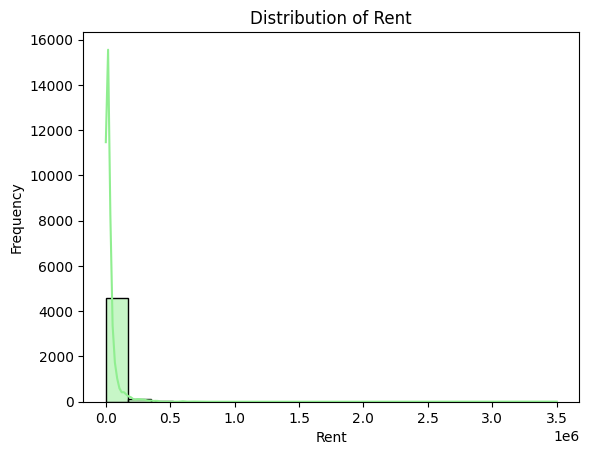

21.409942283288803


In [373]:
sns.histplot(df['Rent'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Rent')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()
print(df['Rent'].skew())

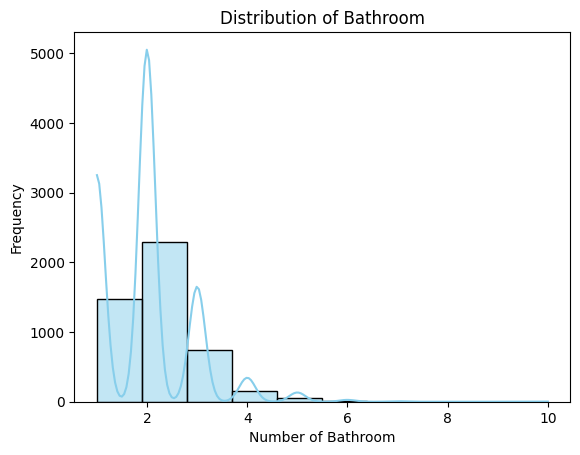

0.5992157733648072


In [374]:
sns.histplot(df['Bathroom'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Bathroom')
plt.xlabel('Number of Bathroom')
plt.ylabel('Frequency')
plt.show()
print(df['BHK'].skew())

In [375]:
from sklearn.preprocessing import PowerTransformer, StandardScaler


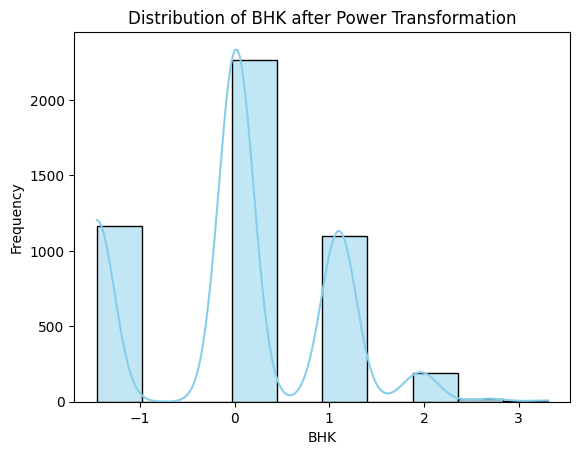

-0.005718213972698176


In [376]:
pt_BHK = PowerTransformer(method='yeo-johnson')
scaler_BHK = StandardScaler()
df['BHK_transformed'] = pt_BHK.fit_transform(df[['BHK']])
df['BHK_transformed'] = scaler_BHK.fit_transform(df[['BHK_transformed']])
sns.histplot(df['BHK_transformed'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of BHK after Power Transformation')
plt.xlabel('BHK')
plt.ylabel('Frequency')
plt.show()
print(df['BHK_transformed'].skew())

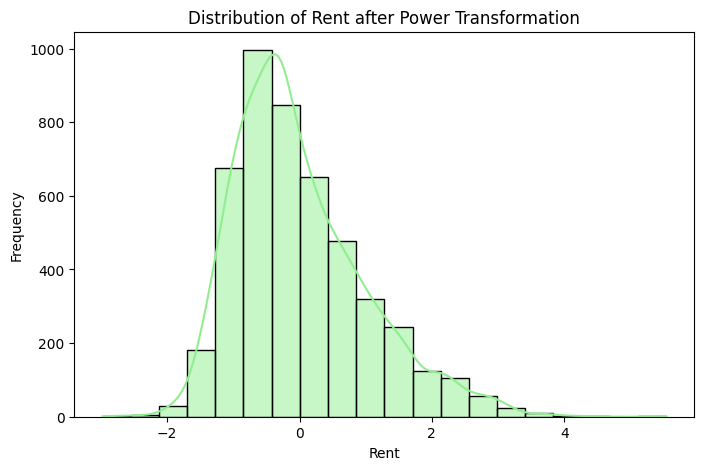

0.9090024947791435


In [377]:
scaler_y = StandardScaler()
df['Rent_transformed'] = np.log1p(df['Rent'])
df['Rent_transformed'] = scaler_y.fit_transform(df[['Rent_transformed']])
plt.figure(figsize=(8,5))
sns.histplot(df['Rent_transformed'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Rent after Power Transformation')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()
print(df['Rent_transformed'].skew())

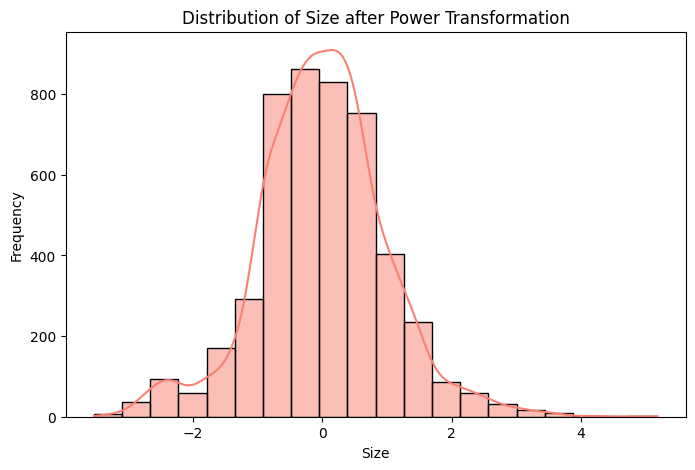

0.08229828671608086


In [378]:
pt_Size = PowerTransformer(method='yeo-johnson')
scaler_Size = StandardScaler()
df['Size_transformed'] = pt_Size.fit_transform(df[['Size']])
df['Size_transformed'] = scaler_Size.fit_transform(df[['Size_transformed']])
plt.figure(figsize=(8,5))
sns.histplot(df['Size_transformed'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Size after Power Transformation')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()
print(df['Size_transformed'].skew())

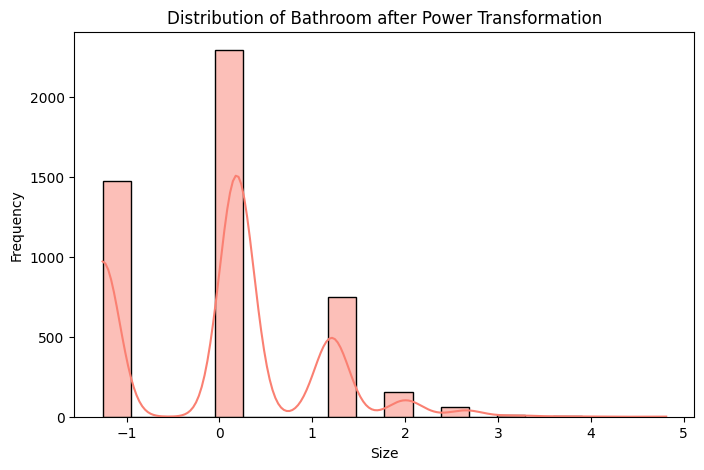

0.3012875428582889


In [379]:
scaler_Bathroom = StandardScaler()
df['Bathroom_transformed'] = np.log1p(df['Bathroom'])
df['Bathroom_transformed'] = scaler_Bathroom.fit_transform(df[['Bathroom_transformed']])
plt.figure(figsize=(8,5))
sns.histplot(df['Bathroom_transformed'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Bathroom after Power Transformation')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()
print(df['Bathroom_transformed'].skew())

In [380]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,BHK_transformed,Rent_transformed,Size_transformed,Bathroom_transformed
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0.017108,-0.713054,0.418173,0.184957
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.017108,0.027042,-0.091187,-1.258965
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.017108,-0.146488,0.259952,-1.258965
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,0.017108,-0.713054,-0.091187,-1.258965
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,0.017108,-1.020208,0.001613,-1.258965


In [381]:
df_model = df[['BHK_transformed', 'Size_transformed', 'Bathroom_transformed','City', 'Furnishing Status','Area Type','Rent_transformed']].copy()
categorical_cols = ['City', 'Furnishing Status','Area Type']
df_encoded = pd.get_dummies(df_model, columns=categorical_cols)
df_encoded.head()

,BHK_transformed,Size_transformed,Bathroom_transformed,Rent_transformed,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area
0,0.017108,0.418173,0.184957,-0.713054,False,False,False,False,True,False,False,False,True,False,False,True
1,0.017108,-0.091187,-1.258965,0.027042,False,False,False,False,True,False,False,True,False,False,False,True
2,0.017108,0.259952,-1.258965,-0.146488,False,False,False,False,True,False,False,True,False,False,False,True
3,0.017108,-0.091187,-1.258965,-0.713054,False,False,False,False,True,False,False,False,True,False,False,True
4,0.017108,0.001613,-1.258965,-1.020208,False,False,False,False,True,False,False,False,True,False,True,False


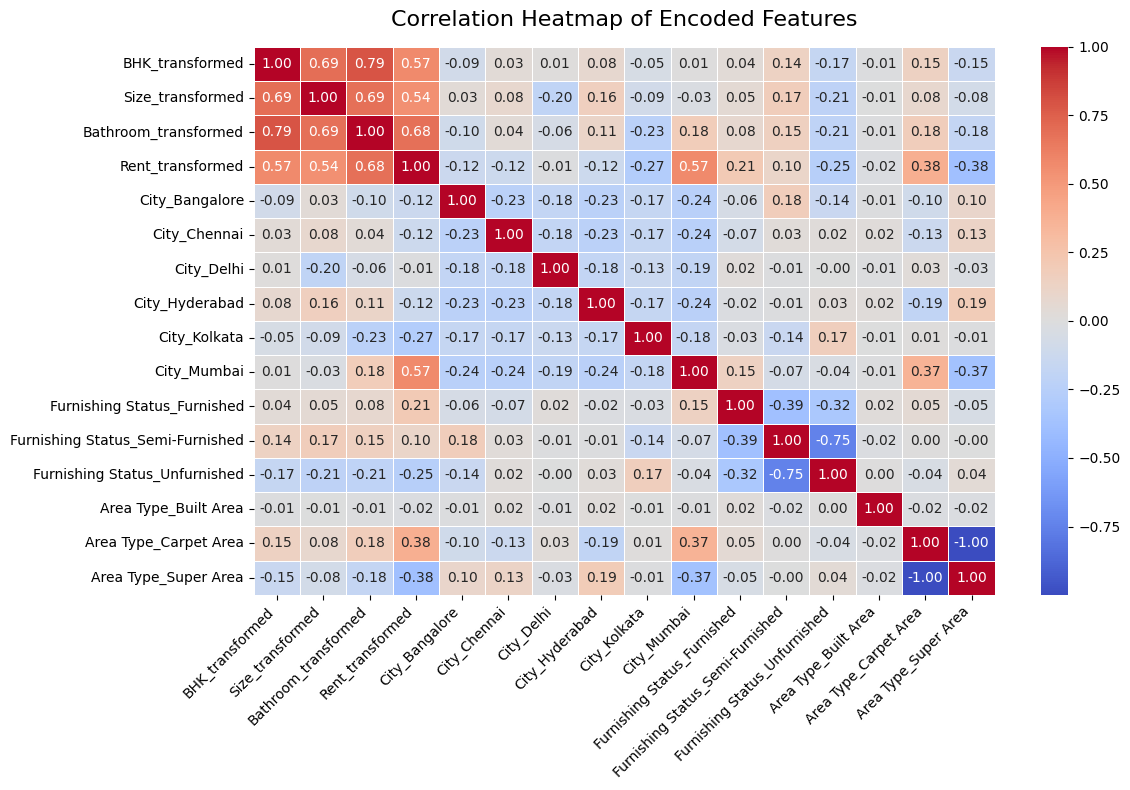

In [382]:
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,           
    fmt=".2f",            
    cmap="coolwarm",      
    linewidths=0.5       
)
plt.title("Correlation Heatmap of Encoded Features", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [383]:
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)
df_encoded.head()

,BHK_transformed,Size_transformed,Bathroom_transformed,Rent_transformed,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area
0,0.017108,0.418173,0.184957,-0.713054,0,0,0,0,1,0,0,0,1,0,0,1
1,0.017108,-0.091187,-1.258965,0.027042,0,0,0,0,1,0,0,1,0,0,0,1
2,0.017108,0.259952,-1.258965,-0.146488,0,0,0,0,1,0,0,1,0,0,0,1
3,0.017108,-0.091187,-1.258965,-0.713054,0,0,0,0,1,0,0,0,1,0,0,1
4,0.017108,0.001613,-1.258965,-1.020208,0,0,0,0,1,0,0,0,1,0,1,0


In [384]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BHK_transformed                   4746 non-null   float64
 1   Size_transformed                  4746 non-null   float64
 2   Bathroom_transformed              4746 non-null   float64
 3   Rent_transformed                  4746 non-null   float64
 4   City_Bangalore                    4746 non-null   int64  
 5   City_Chennai                      4746 non-null   int64  
 6   City_Delhi                        4746 non-null   int64  
 7   City_Hyderabad                    4746 non-null   int64  
 8   City_Kolkata                      4746 non-null   int64  
 9   City_Mumbai                       4746 non-null   int64  
 10  Furnishing Status_Furnished       4746 non-null   int64  
 11  Furnishing Status_Semi-Furnished  4746 non-null   int64  
 12  Furnis

In [385]:
X = df_encoded.drop(['Rent_transformed'], axis=1)
y = df_encoded['Rent_transformed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient (Slope)': model.coef_
})
intercept = model.intercept_
r2_test = r2_score(y_test, y_test_pred)
mse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Intercept:", intercept)
print("Coefficients:\n", coefficients)
print("Test R2:", r2_test)
print("Test RMSE:", mse_test)

Intercept: -0.05669164482656725
Coefficients:
                              Feature  Coefficient (Slope)
0                    BHK_transformed             0.175778
1                   Size_transformed             0.297015
2               Bathroom_transformed             0.209043
3                     City_Bangalore            -0.156207
4                       City_Chennai            -0.249761
5                         City_Delhi             0.189640
6                     City_Hyderabad            -0.350664
7                       City_Kolkata            -0.464576
8                        City_Mumbai             1.031569
9        Furnishing Status_Furnished             0.157669
10  Furnishing Status_Semi-Furnished            -0.020075
11     Furnishing Status_Unfurnished            -0.137594
12              Area Type_Built Area            -0.111255
13             Area Type_Carpet Area             0.150166
14              Area Type_Super Area            -0.038911
Test R2: 0.79154573822353

In [386]:
BHK = 2
Size = 1000
Bathroom = 2
BHK_s = scaler_BHK.transform(pt_BHK.transform([[BHK]]))
Size_s = scaler_Size.transform(pt_Size.transform([[Size]]))
Bath_s = scaler_Bathroom.transform(np.log1p([[Bathroom]]))
row = np.zeros(X_train.shape[1])
row[X_train.columns.get_loc('BHK_transformed')] = BHK_s
row[X_train.columns.get_loc('Size_transformed')] = Size_s
row[X_train.columns.get_loc('Bathroom_transformed')] = Bath_s
row[X_train.columns.get_loc('City_Bangalore')] = 1
row[X_train.columns.get_loc('Furnishing Status_Semi-Furnished')] = 1
row[X_train.columns.get_loc('Area Type_Super Area')] = 1
pred_scaled = model.predict([row])
pred_log = scaler_y.inverse_transform(pred_scaled.reshape(-1,1))[0][0]
pred_rent = np.expm1(pred_log)

print(f"Predicted Monthly Rent: ₹{pred_rent:,.2f}")


Predicted Monthly Rent: ₹16,896.58


d:\AIWF\Task11(7.10.25)\env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\AIWF\Task11(7.10.25)\env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\AIWF\Task11(7.10.25)\env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\AIWF\Task11(7.10.25)\env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\AIWF\Task11(7.10.25)\env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\kanik\A

In [387]:
import pickle
house_rent_data = {
    'model': model,                   
    'pt_BHK': pt_BHK,                 
    'scaler_BHK': scaler_BHK,         
    'pt_Size': pt_Size,               
    'scaler_Size': scaler_Size,       
    'scaler_Bathroom': scaler_Bathroom, 
    'scaler_y': scaler_y,             
    'columns': list(X_train.columns)  
}

with open('house_rent.pkl', 'wb') as f:
    pickle.dump(house_rent_data, f)
